In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch

In [ ]:
df=pd.read_csv('/content/chrome_reviews.csv')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [ ]:
df.shape

(7204, 10)

In [ ]:
df.columns

Index(['ID', 'Review URL', 'Text', 'Star', 'Thumbs Up', 'User Name',
       'Developer Reply', 'Version', 'Review Date', 'App ID'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [ ]:
df.isnull().sum()

ID                    0
Review URL            0
Text                  1
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version              85
Review Date           0
App ID                0
dtype: int64

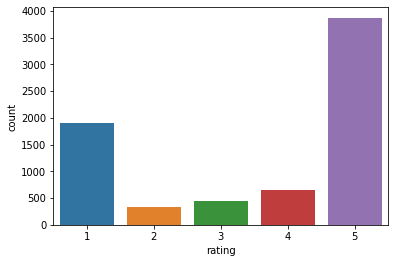

In [ ]:
sns.countplot(x='Star',data=df)
plt.xlabel('rating')
plt.show()

In [ ]:
df['Star'].value_counts(normalize=True)*100

5    53.734037
1    26.290949
4     9.050527
3     6.260411
2     4.664076
Name: Star, dtype: float64

In [ ]:
df=df[df['Star']!=3]

In [ ]:
df['Star'].value_counts(normalize=True)*100

5    57.322671
1    28.046794
4     9.654968
2     4.975566
Name: Star, dtype: float64

In [ ]:
def group(rating):
  if rating <=2:
    return 0
  else:
    return 1

In [ ]:
df['rating']=df['Star'].apply(lambda x :group(x))

In [ ]:
df['rating'].value_counts(normalize=True)*100

1    66.97764
0    33.02236
Name: rating, dtype: float64

In [ ]:
df=df[['ID','Text','rating']]

In [ ]:
df.shape

(6753, 3)

In [ ]:
df.drop('ID',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.sample()

,Text,rating
2094,Ok,1


In [ ]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

In [ ]:
poor_rating=' '.join(words for words in df[df['rating']==0].Text)

In [ ]:
stopwords=STOPWORDS.update(['Google','chrome'])

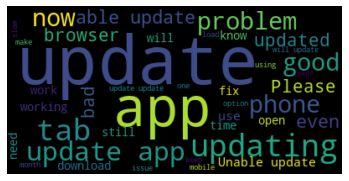

In [ ]:
word_cloud=WordCloud(stopwords=STOPWORDS,max_words=40,background_color='black').generate(poor_rating)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
good_rating=' '.join(words for words in df[df['rating']==1].Text)

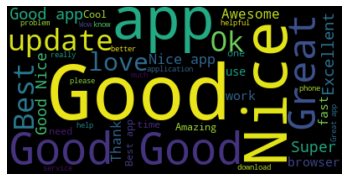

In [ ]:
word_cloud=WordCloud(stopwords=STOPWORDS,max_words=40,background_color='black').generate(good_rating)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
reviews=df.Text.values
labels=df.rating.values

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 34.1 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 36.0 MB/s 
     |████████████████████████████████| 6.5 MB 33.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-cased',do_lower_case=False)

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6752 entries, 0 to 7203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    6752 non-null   object
 1   rating  6752 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 158.2+ KB


In [ ]:
max_len=0
rev=['nikhil']
for review in reviews:
  input_ids=tokenizer.encode(review,add_special_tokens=True)
  max_len=max(max_len,len(input_ids))
  if len(input_ids)>=max_len:
    rev[0]=review

print('max sentence length:',max_len)
print(rev[0])

max sentence length: 270
BEWARE: THIS IS A HUGE SELLOUT 4 EVERYONE W/ATT/CNN/MSNBC/ MICROSOFT/CCP/DEMO-RATS/STUPID OLD RHINOS & MUCH MORE SINCE THEY'RE PUSH THE AD'S THAT I'VE EVER SEEN IN MY LIFE FROM THE START OF THE FIRST 💯% PUSHIN THEY'RE NARRATIVES CNN BS DOWN OUR THROATS & AD'S THAT I'VE EVER SEEN N MY LIFE FROM FIRST CELL PHONE COMPANY 2 THESE SELLOUTS OF ATT THAN I'VE NEVER HAD THIS PROBLEM W/EITHER ONE OF THEIR MUCH BETTER COMPETITION OF VERIZON OR SPRINT MOBILE! STOP SELLIN US OUT ASAP ATT I'LL GO! #WWG1WGA


In [ ]:
token_lens=[]
for rev in df.Text:
  tokens=tokenizer.encode(rev,max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


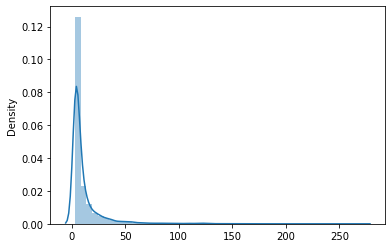

In [ ]:
sns.distplot(token_lens)

In [ ]:
token_lens.sort()

In [ ]:
sum(token_lens)/len(token_lens)

11.321238151658768

In [ ]:
from collections import Counter
c=Counter(token_lens)
c

Counter({3: 1798,
         4: 958,
         5: 680,
         6: 499,
         7: 336,
         8: 271,
         9: 224,
         10: 187,
         11: 169,
         12: 126,
         13: 114,
         14: 109,
         15: 92,
         16: 67,
         17: 71,
         18: 57,
         19: 46,
         20: 61,
         21: 46,
         22: 45,
         23: 42,
         24: 40,
         25: 40,
         26: 40,
         27: 36,
         28: 24,
         29: 25,
         30: 26,
         31: 21,
         32: 31,
         33: 21,
         34: 20,
         35: 14,
         36: 25,
         37: 19,
         38: 21,
         39: 13,
         40: 8,
         41: 12,
         42: 6,
         43: 10,
         44: 10,
         45: 13,
         46: 9,
         47: 7,
         48: 11,
         49: 9,
         50: 11,
         51: 6,
         52: 8,
         53: 12,
         54: 8,
         55: 6,
         56: 15,
         57: 4,
         58: 6,
         59: 8,
         60: 3,
         61: 3,
     

In [ ]:
import torch

In [ ]:
max_length=64
input_ids = []
attention_masks = []
for rev in reviews:
    encoded_dict = tokenizer.encode_plus(
                        rev,                     
                        add_special_tokens = True, 
                        max_length = 64,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
    
    
    input_ids.append(encoded_dict['input_ids'])
    
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_masks, labels)
train_size = int(np.round((0.8 * len(dataset))))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:} training samples'.format(train_size))
print('{:} validation samples'.format(val_size))

5402 training samples
1350 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset, 
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )
validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained(
    "bert-base-cased",
    num_labels = 2, 
    output_attentions = False, 
    output_hidden_states = False,
)
model.cuda()

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np
def get_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np
seed_val = 2022

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

predictions , true_labels = [], []
training_stats = []

total_t0 = time.time()
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
      
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        
        model.zero_grad()        

       
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

      
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    
    training_time = format_time(time.time() - t0)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        

            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        
        loss = result.loss
        logits = result.logits
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        predictions.append(logits)
        true_labels.append(label_ids)

        total_eval_accuracy += get_accuracy(logits, label_ids)
        
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Average training loss: 0.40
  Training epcoh took: 0:01:48
Running Validation...
  Accuracy: 0.87
  Validation Loss: 0.35
  Validation took: 0:00:09

======== Epoch 2 / 3 ========
Training...
  Average training loss: 0.30
  Training epcoh took: 0:01:48
Running Validation...
  Accuracy: 0.88
  Validation Loss: 0.35
  Validation took: 0:00:09

======== Epoch 3 / 3 ========
Training...
  Average training loss: 0.25
  Training epcoh took: 0:01:48
Running Validation...
  Accuracy: 0.88
  Validation Loss: 0.37
  Validation took: 0:00:09
Training complete!
Total training took 0:05:52 (h:mm:ss)


In [ ]:
import pandas as pd
pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.40,0.35,0.87,0:01:48,0:00:09
2,0.30,0.35,0.88,0:01:48,0:00:09
3,0.25,0.37,0.88,0:01:48,0:00:09


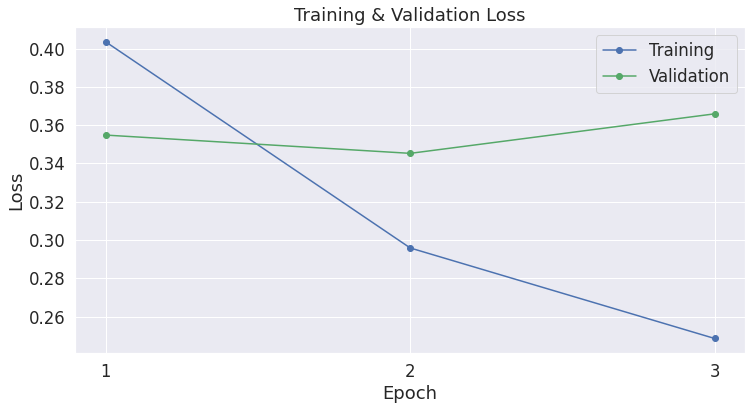

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []
for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

In [ ]:
discrepancy=[]
for i in range(len(true_labels)):
  if true_labels[i]!=predictions[i]:
    discrepancy.append


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

flat_true_labels = np.concatenate(true_labels, axis=0)


mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.725


In [ ]:
torch.save(model.state_dict(),'/content/model.pt')